In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib.ticker import  FuncFormatter
import yfinance as yf #importing Yahoo Finance Liberary
from datetime import date, timedelta

import warnings
warnings.filterwarnings("ignore")

df = pd.read_csv(r"C:\Users\Mohamed Fawzi\Desktop\Stock Market Analysis\stock_analysis.csv")
df

,Unnamed: 0,Date,Ticker,Company,Close,High,Low,Open,Volume,Year,Month Name,Month
0,0,2015-01-02,AAPL,Apple,24.347174,24.817059,23.906238,24.805924,212818400.0,2015,Jan,1
1,1,2015-01-02,AMZN,Amazon,15.426000,15.737500,15.348000,15.629000,55664000.0,2015,Jan,1
2,2,2015-01-02,GOOGL,Google,26.381865,26.693236,26.298664,26.533812,26480000.0,2015,Jan,1
3,3,2015-01-02,META,Meta Platforms,78.151466,78.629643,77.404320,78.280977,18177500.0,2015,Jan,1
4,4,2015-01-02,MSFT,Microsoft,40.152489,40.719226,39.963578,40.066621,27913900.0,2015,Jan,1
...,...,...,...,...,...,...,...,...,...,...,...,...
15217,15217,2025-02-03,AMZN,Amazon,237.419998,239.250000,232.899994,234.059998,37186200.0,2025,Feb,2
15218,15218,2025-02-03,GOOGL,Google,201.229996,203.750000,200.100006,200.690002,27735600.0,2025,Feb,2
15219,15219,2025-02-03,META,Meta Platforms,697.460022,704.000000,675.250000,675.909973,21378500.0,2025,Feb,2
15220,15220,2025-02-03,MSFT,Microsoft,410.920013,415.410004,408.660004,411.600006,25580600.0,2025,Feb,2


### Descriptive Statistics

In [22]:
# 2. Descriptive Statistics
desc_stats = df.groupby('Company').agg(
    Avg_Close=('Close', 'mean'),
    Avg_Volume=('Volume', 'mean'),
    Start_Price=('Close', 'first'),
    End_Price=('Close', 'last')
).reset_index()

desc_stats['Cumulative_Return'] = ((desc_stats['End_Price'] - desc_stats['Start_Price']) / desc_stats['Start_Price']) * 100

desc_stats

,Company,Avg_Close,Avg_Volume,Start_Price,End_Price,Cumulative_Return
0,Amazon,102.286240,7.578681e+07,15.426000,237.419998,1439.089872
1,Apple,95.442205,1.166194e+08,24.347174,228.009995,836.494714
2,Google,83.372676,3.509152e+07,26.381865,201.229996,662.758809
3,Meta Platforms,224.919994,2.282444e+07,78.151466,697.460022,792.446494
4,Microsoft,184.040083,2.883271e+07,40.152489,410.920013,923.398615
5,NVIDIA,21.734074,4.662680e+08,0.483144,116.660004,24046.029666


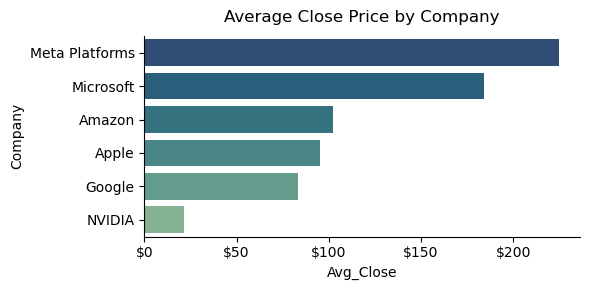

In [27]:

avg_close = desc_stats.sort_values(by='Avg_Close', ascending=False).copy()

plt.figure(figsize=(6, 3))

sns.barplot(data=avg_close,
            x='Avg_Close',
            y='Company',
            palette='crest_r',
           )


def curruncy_formatter(x, pos):
    if x >= 1e6:
        return f"${x / 1e6:.0f}M"
    else:
        return f"${x:.0f}"
    
# Format x-axis tick labels
plt.gca().xaxis.set_major_formatter(FuncFormatter(curruncy_formatter))

plt.title('Average Close Price by Company', pad=10)

sns.despine()
plt.tight_layout()
plt.show()

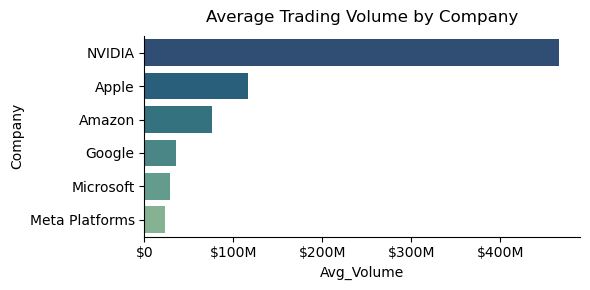

In [26]:

avg_volume = desc_stats.sort_values(by='Avg_Volume', ascending=False).copy()

plt.figure(figsize=(6, 3))
sns.barplot(data=avg_volume,
            x='Avg_Volume',
            y='Company',
            palette='crest_r',
           )
def curruncy_formatter(x, pos):
    if x >= 1e6:
        return f"${x / 1e6:.0f}M"
    else:
        return f"${x:.0f}"
    
# Format x-axis tick labels
plt.gca().xaxis.set_major_formatter(FuncFormatter(curruncy_formatter))

  
plt.title('Average Trading Volume by Company', pad=10)

sns.despine()
plt.tight_layout()
plt.show() 

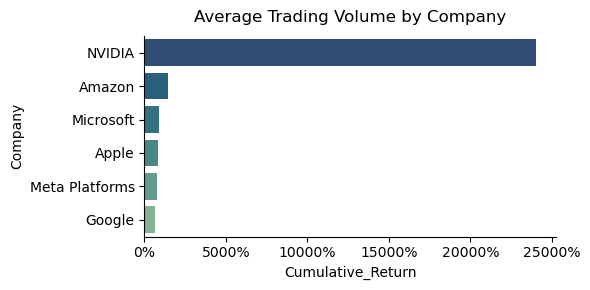

In [29]:

cumulative_return = desc_stats.sort_values(by='Cumulative_Return', ascending=False).copy()

plt.figure(figsize=(6, 3))
sns.barplot(data=cumulative_return,
            x='Cumulative_Return',
            y='Company',
            palette='crest_r',
           )

def perc_formatter(x, pos):
    if x >= 1e6:
        return f"${x / 1e3:.0f}K"
    else:
        return f"{x:.0f}%"
    
# Format x-axis tick labels
plt.gca().xaxis.set_major_formatter(FuncFormatter(perc_formatter))
plt.title('Average Trading Volume by Company', pad=10)

sns.despine()
plt.tight_layout()
plt.show() 